In [1]:
import textwrap

import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.manifold import TSNE

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')

matplotlib.rcParams['font.family'] = 'Times New Roman'
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r'./data_processed/prediction_evaluation/existing_methods.xlsx')

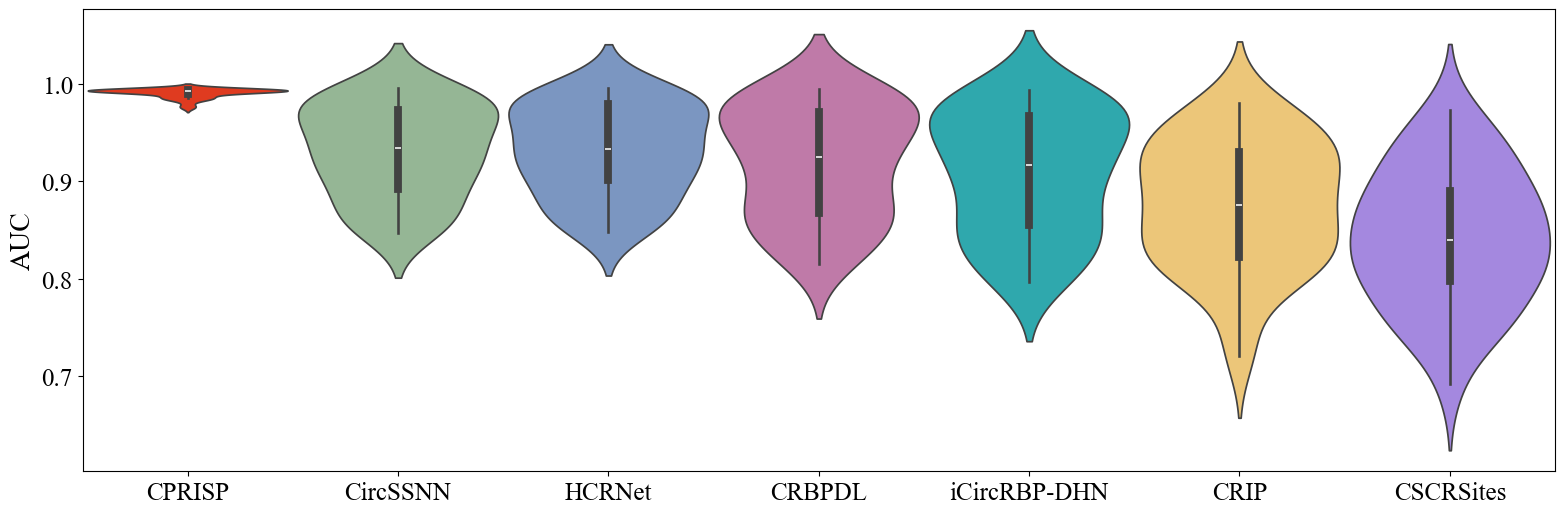

In [4]:
my_pal = {"CPRISP": "#FF2400", "CRIP": "#FFCC66", "iCircRBP-DHN":"#1ABCC2", "CRBPDL":"#CA6FAC", "HCRNet":"#6F94CD","CSCRSites":"#9F79EE","CircSSNN":"#8FBC8F"}
f, ax = plt.subplots(figsize=(19, 6))

sns.violinplot(x=df["Prediction models"], y=df["x"], data=df, palette=my_pal, width=0.95)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.ylabel("AUC", fontsize=20)
plt.xlabel("", fontsize=20)
plt.show()

  File "D:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


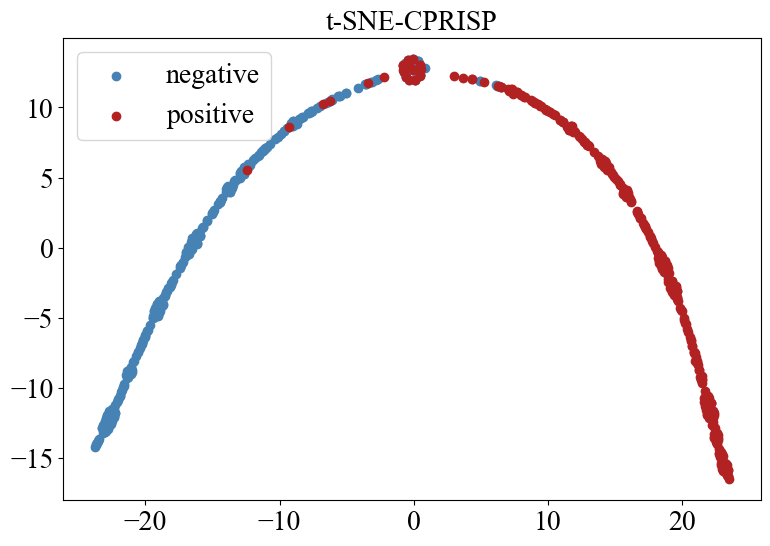

In [5]:
label = np.load("./data_processed/prediction_evaluation/tsne_label.npy")
pred = np.load("./data_processed/prediction_evaluation/tsne_pred.npy")

tsne = TSNE(n_components=2, learning_rate=100, perplexity=40, random_state=42).fit_transform(pred)

plt.figure(figsize=(9, 6))
class_0_mask = (label == 0)
class_1_mask = (label == 1)

plt.scatter(tsne[class_0_mask, 0], tsne[class_0_mask, 1], c='#4682B4', label='negative')

plt.scatter(tsne[class_1_mask, 0], tsne[class_1_mask, 1], c='#B22222', label='positive')

# plt.scatter(preds[:, 0], preds[:, 1], c=labels, label='b',marker='o')
#
# for i in range(len(tsne)):
#     plt.scatter(tsne[i, 0], tsne[i, 1], label=label[i],c = colors[label[i]])
plt.title('t-SNE-CPRISP',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.show()

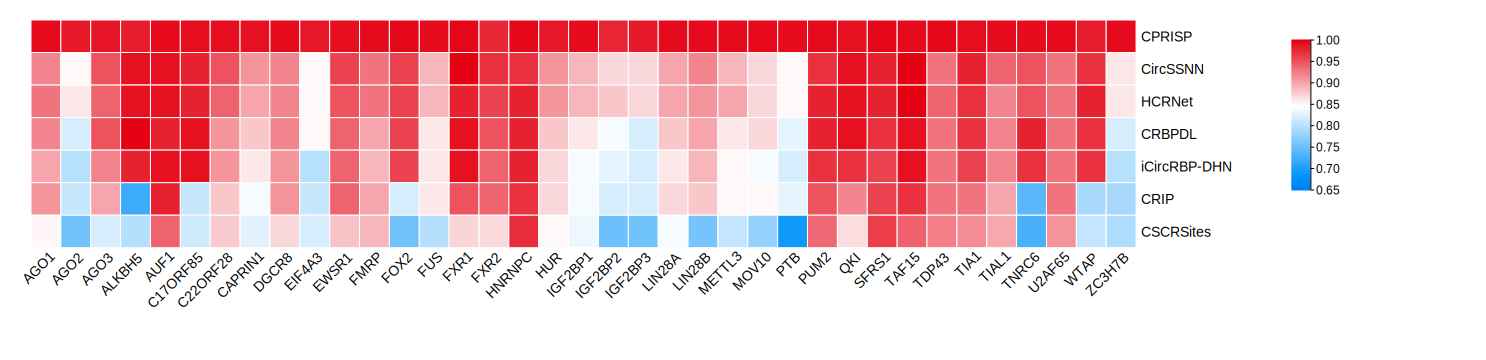

In [6]:
from IPython.display import SVG, display

# This figure was generated using TBtools-II.
display(SVG(filename='./data_processed/prediction_evaluation/heatmap.svg'))

In [7]:
df = pd.read_excel(r'./data_processed/prediction_evaluation/sklearn.xlsx')

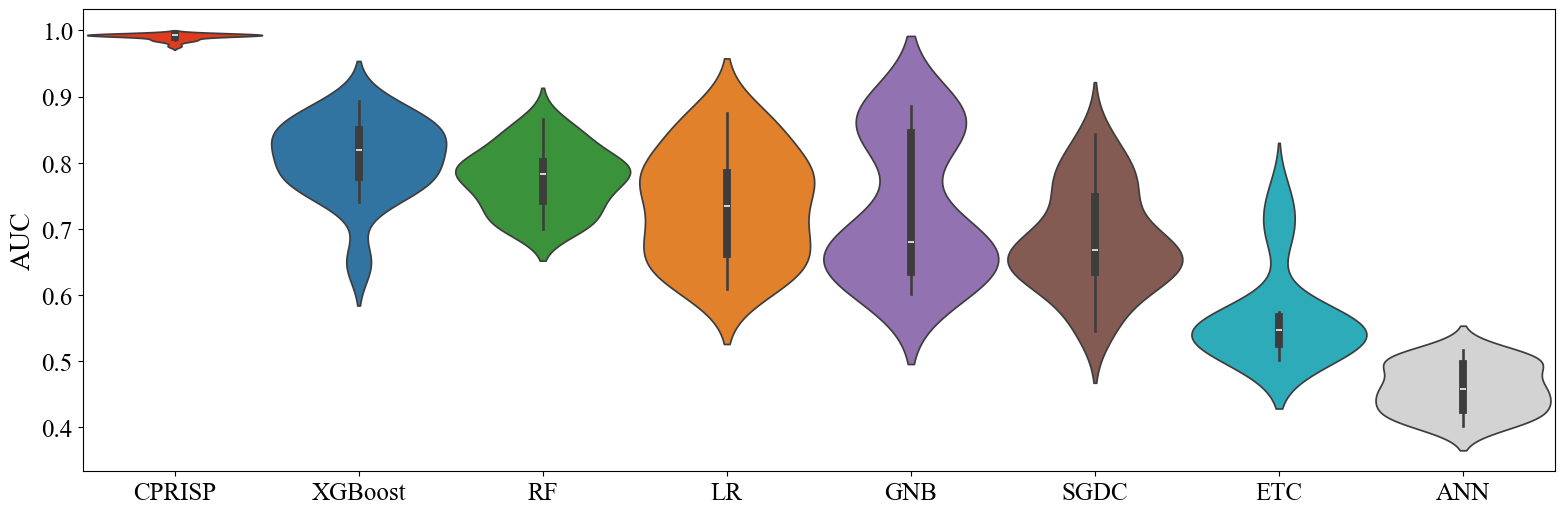

In [8]:
my_pal = {"CPRISP": "#FF2400", "XGBoost": "#1F77B4", "RF":"#2CA02C", "LR":"#FF7F0E", "GNB":"#9467BD", "SGDC":"#8C564B", "ETC":"#17BECF", "ANN":"#D3D3D3"}

f, ax = plt.subplots(figsize=(19, 6))

sns.violinplot(x=df["Prediction models"], y=df["x"], data=df, palette=my_pal, width=0.95)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.ylabel("AUC", fontsize=20)
plt.xlabel("", fontsize=20)
plt.show()

In [9]:
df = pd.read_excel(r'./data_processed/prediction_evaluation/CRSP.xlsx')

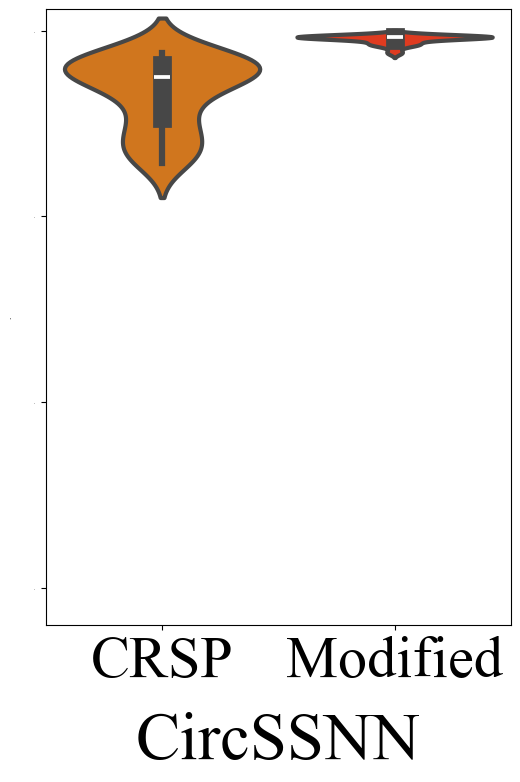

In [13]:
my_pal = {"CRSP": "#EE7600", "Modified": "#FF2400"}

f, ax = plt.subplots(figsize=(6, 8))

sns.violinplot(x=df["Prediction models"], y=df["x"], data=df, palette=my_pal, width=0.84, linewidth=3)  #小提琴, x1代表未加rbp, x2代表加了RBP

ax.set_ylim(bottom=0.36)
plt.yticks([0.4, 0.6, 0.8, 1.0])

plt.xticks(fontsize=42)
plt.yticks(fontsize=0)

ax.set_ylabel("AUC", fontsize=0, labelpad=16)
ax.set_xlabel("CircSSNN", fontsize=48, labelpad=16)

plt.show()